### Determining Whether Someone Has Breast Cancer
In this project, I will aim to build a model which will help me determine whether someone has breast cancer based on relevant features such as radius mean and texture mean (of breast lobes). This is a supervised learning problem and I will be using classification to see whether the person has a malignant or benign tumor in their breast. This is important because breast cancer is the most common cancer found in women in the world. I want to build a model that makes as few errors as possible through metrics such as accuracy, precision and f1 score to help doctors and healthcare professionals when they diagnose women for breast cancer.

I got my dataset from Kaggle. The link and citation is down below.

Source: H, M. Y. (2021, December 29). Breast cancer dataset. Kaggle. Retrieved February 25, 2022, from https://www.kaggle.com/yasserh/breast-cancer-dataset 

In [1]:
import pandas as pd

In [2]:
# current working location
pwd

'/Users/richard'

In [3]:
# change working location to where dataset is stored
cd Downloads

/Users/richard/Downloads


In [4]:
df = pd.read_csv("breast-cancer.csv")

There are 569 data points in this dataset along with 31 different features.

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
len(df)

569

Most of the features are floats. Only id is an int. Diagnosis is an object because it categorizes whether the tumor is malignant or benign. 30 floats, 1 int for the features. There are many features. One key feature is radius mean which measures the radius mean of the breast lobes. Perimeter mean measures the outer perimeter of lobes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Here we can see a heat map of all of the correlations between features in the dataset. We used Seaborn on df.corr() to get this plot. This plot is useful to see whether collinearity or multicollinearity is present in the data. The diagonal is white because each feature will be perfectly correlated with itself. There are also some patches in the plot where there is a high correlation between features which may indicate multicollinearity. I will continue with all of my data for now and if the model does not do well, I will come back and remove any features that are highly correlated to another. Since this is a classification problem and I will be using classifiers, I do not expect to run into any problems.

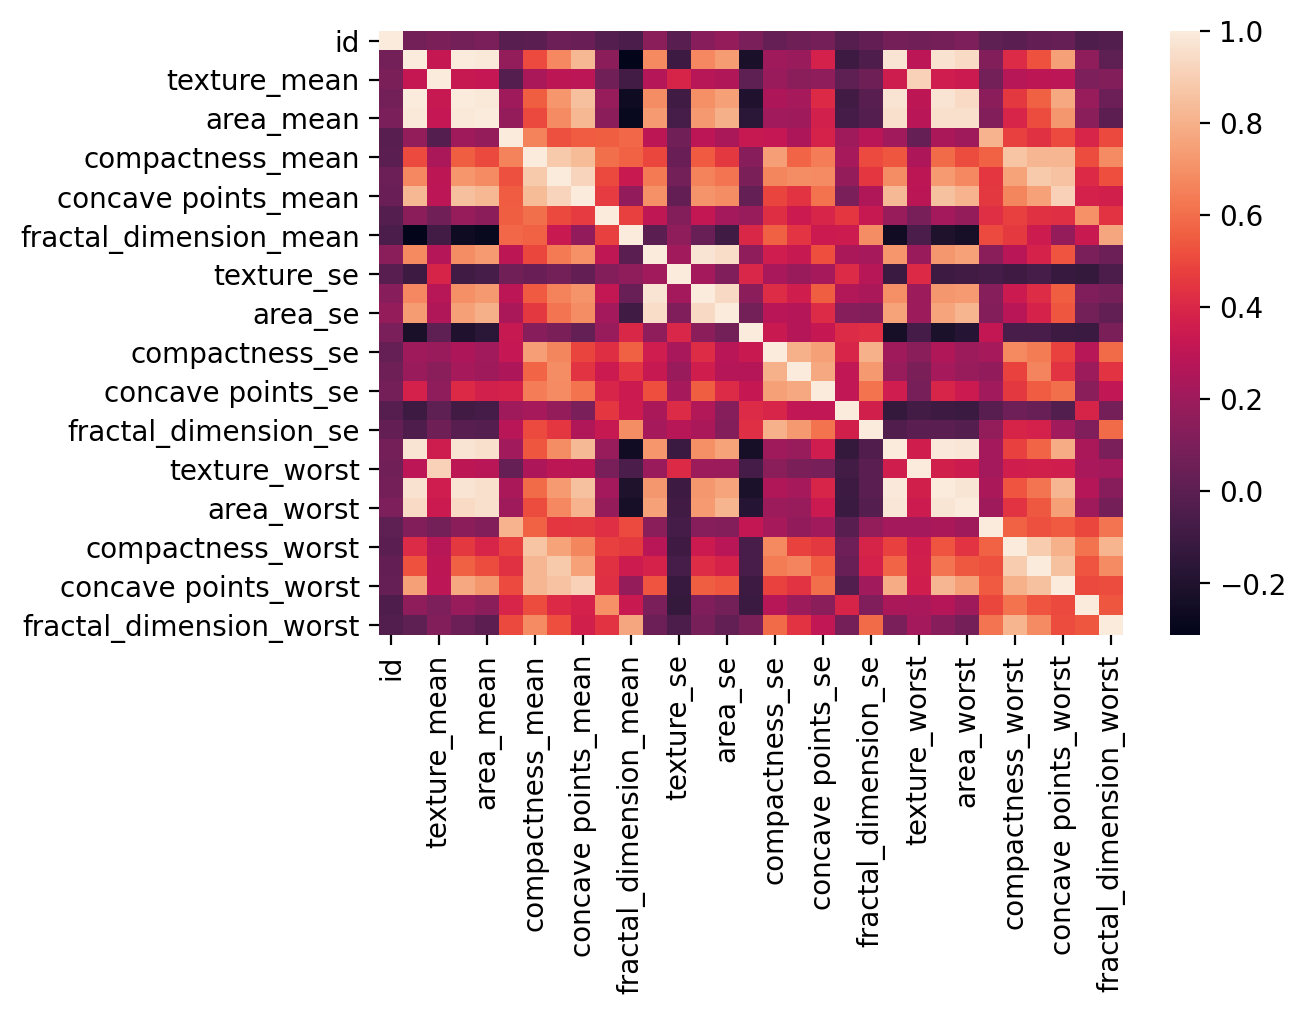

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# change figure dpi to make it clearer
plt.figure(dpi=200)
sns.heatmap(df.corr());

Count plots are great at seeing whether our target variable is balanced or imbalanced. Our data is clearly imbalanced as shown below. This means we should avoid valuing the accuracy metric based on how it produces a value.

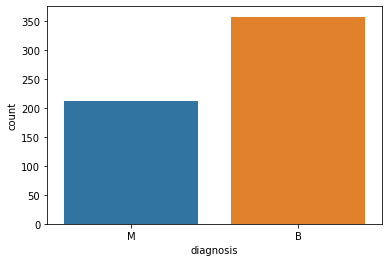

In [11]:
sns.countplot(x=df['diagnosis']);

Box plots are useful in seeing whether the classes for the target variable differ in the numerical values for a specific feature. You can see clearly that if the tumor is malignant, the median radius mean is higher than the median for a benign tumor

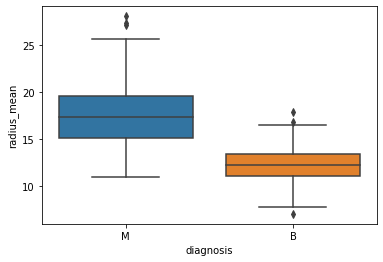

In [12]:
sns.boxplot(x=df['diagnosis'],y=df['radius_mean']);

Let's see if there are any NA values in our dataset. If there are, we may need to either drop the row, column, or impute values.

In [13]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Let's drop id and diagnosis from df and call it X. Id is not useful information for our model building and analysis so we will be permanently dropping it. Diagnosis will be placed into a y variable.

In [14]:
X = df.drop(['id','diagnosis'],axis=1)

Are there any columns of the features that have the wrong data type? No. All are floats and are correct.

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [16]:
y = df['diagnosis']

We have an imbalanced y variable. We will have to be careful with looking at accuracy as a metric later on. If class_weight is available for the model as a hyperparameter, we should make it equal to 'balanced' to build the model more accurately.

In [17]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In order to use GridSearchCV later, we need to convert the diagnosis column into a dummy variable. We will also drop the first column because if we know that it is a 1 for one column, it is 0 for the other.

In [18]:
y = pd.get_dummies(df,drop_first=True)

In [19]:
y = y['diagnosis_M']

We have dropped the id column and converted diagnosis to be a dummy variable for the data cleaning section of our project. We have also checked whether there any NA values in the dataset but found there were none. Also, we have checked to see if all the columns for the features are the correct data type and saw that we have an imbalanced y variable. Let's move on to the next section of our project now!

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# 70/30 split; make test_size equal to 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

Let's start off by training a K-nearest neighbors model and seeing how well it performs!

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# use distance as weights hyperparameter to value the closer points more than the ones farther away
clf = KNeighborsClassifier(weights='distance')

In [28]:
clf.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [29]:
predictions = clf.predict(X_test)

In [30]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

The K-nearest neighbors model has done well with data is has not seen before, with 96% overall accuracy. However, since the data is not balanced, we should look at either precision, recall, or fl-score. They are all at least 94% which is a great sign of performance.

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



As you can see in the confusion matrix, only 7 data points were misclassified by the model. 3 false positives and 4 false negatives. We want to reduce the false negatives as much as we can. It is better for someone who doesn't actually have breast cancer to be told they do than telling someone they don't have it when they actually do.

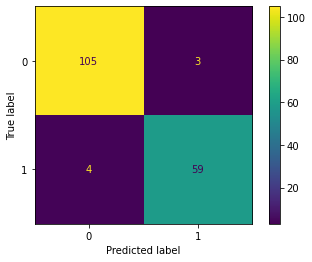

In [32]:
plot_confusion_matrix(clf,X_test,y_test)

The ROC curve shows an AUC of 98%. This is very good. The highest it can be is 100%.

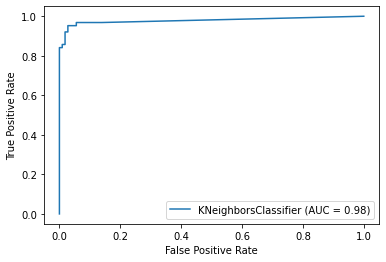

In [33]:
plot_roc_curve(clf,X_test,y_test)

Now, let's use GridSearchCV to find the best K-nearest neighbors model based on our parameter grid listed below.

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {'n_neighbors':[1,3,5,7,9,11]}

In [36]:
# use precision as scoring for best model performance
gsc = GridSearchCV(KNeighborsClassifier(weights='distance'),params,scoring='precision')

In [37]:
gsc.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]},
             scoring='precision')

In [38]:
gsc.best_estimator_

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [39]:
predictions = gsc.predict(X_test)

The KNN model using GridSearchCV produces an even better overall accuracy at 97% and all of the other metrics are at least 95%.

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



This time only 5 points were misclassified. 2 were false positives, 3 were false negatives.

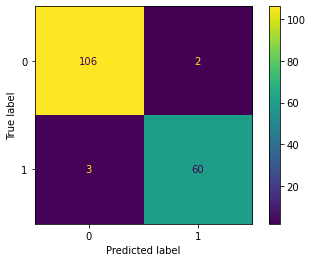

In [41]:
plot_confusion_matrix(gsc,X_test,y_test)

The AUC is now 99%. It is almost at the maximum value it can possibly be.

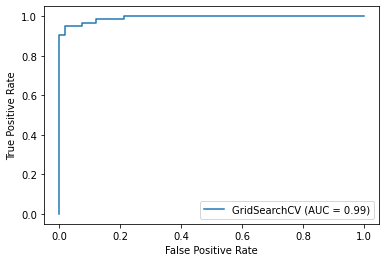

In [42]:
plot_roc_curve(gsc,X_test,y_test)

Finally, using GridSearchCV again, let's find the best RandomForestClassifier model based on our parameter grid listed below.

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
params = {'n_estimators':[25,50,75,100,250,500]}
# use accuracy as scoring for best model performance
gsc = GridSearchCV(RandomForestClassifier(class_weight='balanced'),params,scoring='accuracy')

Notice for RandomForestClassifier, there is a class_weight parameter which we can make equal to 'balanced' so the model knows it is dealing with imbalanced data. It will adjust the weights of the target variable's classes accordingly.

In [45]:
gsc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'n_estimators': [25, 50, 75, 100, 250, 500]},
             scoring='accuracy')

In [54]:
gsc.best_params_

{'n_estimators': 100}

In [47]:
predictions = gsc.predict(X_test)

Using Random Forests with GridSearchCV to classify, produces an incredible 98% overall accuracy and metrics no lower than 95%.

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



4 points were misclassified. 3 were false negatives, 1 was a false positive.

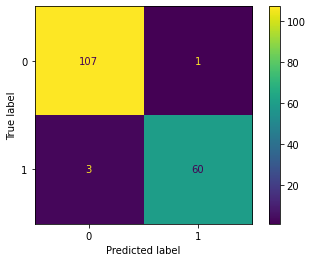

In [49]:
plot_confusion_matrix(gsc,X_test,y_test)

The AUC is 100%. The best possible value for AUC.

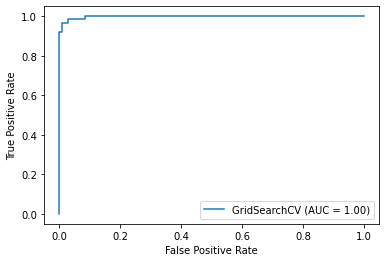

In [50]:
plot_roc_curve(gsc,X_test,y_test)

The best model is the one directly above based on accuracy, precision, recall, fl-score and AUC. It used RandomForestClassifier with n_estimators = 100 and class_weight = 'balanced'. Again, since the data is not balanced, accuracy was not a good metric to look at and compare with the different models. Although, the last model did include 'balanced' as class_weight which makes the model aware that the data is not balanced and models accordingly. We can proceed with a GridSearchCV with more parameters and values and/or try a completely different model but the results I have gotten in this most recent model, are more than enough in my opinion.